In [1]:
import importlib
from params import FuzzyInputVariable_3Trapezoids, FuzzyInputVariable_2Trapezoids, FuzzyInputVariable_List_Trapezoids
from operators import productN
import numpy as np
import seaborn
#from helps_and_enhancers import *
import matplotlib.pyplot as plt
from ANFIS import ANFIS
import time
import copy
from sklearn.metrics import confusion_matrix, accuracy_score
from sklearn.model_selection import train_test_split

<H1>Przygotowanie zbioru danych: XOR<H1>

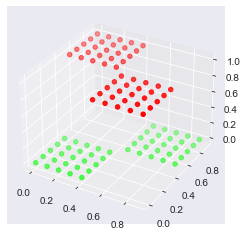

In [2]:
x = np.arange(0, 1, 0.1)
x,y = np.meshgrid(x, x)

dataX = x.flatten()
dataY = y.flatten()
dataXY1 = np.column_stack((dataX,dataY,np.ones(len(dataX))))
dataXY = np.column_stack((dataX,dataY))

data_labels = np.logical_xor(dataX >= 0.5, dataY >= 0.5) 

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

rgb = [[1,0,0] if cc else [0,1,0] for cc in data_labels]

ax.scatter(dataX, dataY, data_labels, c=rgb)

plt.show()

<H1>Utworzenie funkcji przynależności</H1>

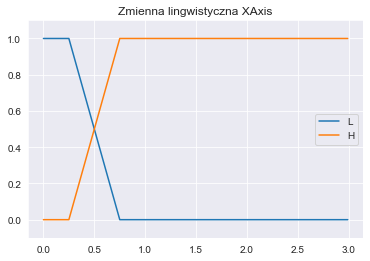

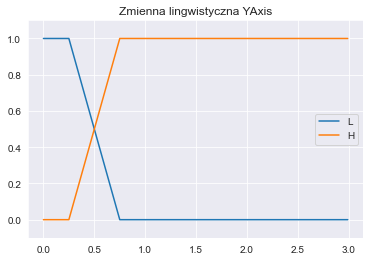

In [3]:
varX = FuzzyInputVariable_2Trapezoids(0.5, 0.5, "XAxis", ["L","H"]) # low, high
varY = FuzzyInputVariable_2Trapezoids(0.5, 0.5, "YAxis", ["L","H"])

#mf1 = [[-0.5, 0.25, 0.25, 0.25], [0.5, 0.25, 0.1, 0.1]]
#varX = FuzzyInputVariable_List_Trapezoids(mf1, "XAxis", ["L","H"])
#varY = FuzzyInputVariable_List_Trapezoids(mf1, "YAxis", ["L","H"])

#Wyświetlanie funkcji przynależnosci
plt.figure()
varX.show()
plt.legend()

plt.figure()
varY.show()
plt.legend()

plt.show()

<H1>Inicjalizacja systemu ANFIS</H1>

Parametry początkowe:
Przesłanki:  [[0.5, 0.5], [0.5, 0.5]] 
Konkluzje:  [[0.4364193  0.35411856 0.46891014]
 [0.39426329 0.81060929 0.29327584]
 [0.88037195 0.96434983 0.07713208]
 [0.41440474 0.86842111 0.81551048]]


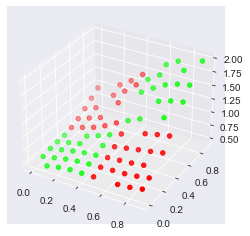

In [4]:
X_train, X_test, y_train, y_test = train_test_split(dataXY, data_labels, test_size=0.2, random_state=25)

fis = ANFIS([varX, varY], X_train.T, y_train)

print("Parametry początkowe:\nPrzesłanki: ",fis.premises, "\nKonkluzje: ", fis.tsk)

fis.show_results()

<H1>Uczenie systemu ANFIS</H1>

Optymalizacja zakończona!
z blędem:   25.875007978292924
Liczba ew:  20392
Liczba it:  50
TIME elapsed:  2.804999828338623


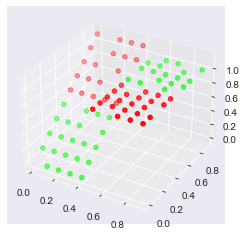

In [5]:
start = time.time()
fis.train(True, True, False, True, n_iter=50)
end = time.time()
print("TIME elapsed: ", end - start)   
fis.training_data = X_train.T
fis.expected_labels = y_train
fis.show_results()

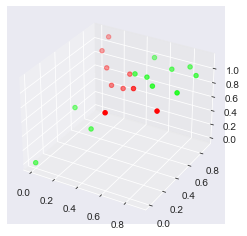

[[3 8]
 [0 9]]


In [6]:
fis.training_data = X_test.T
fis.expected_labels = y_test
fis.show_results()

y_pred = fis.anfis_estimate_labels(fis.premises,fis.op,fis.tsk)
y_pred = list(map(round,y_pred.flatten()))
print(confusion_matrix(y_test, y_pred))

<H1>Sprawdzanie parametrów jakich nauczył się system</H1>

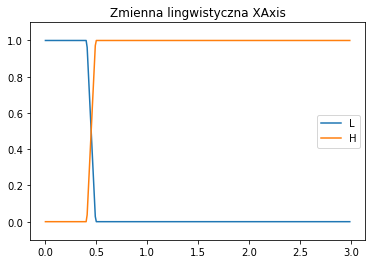

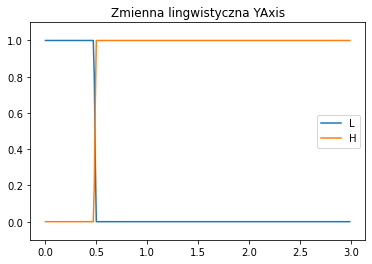

In [24]:
#Wyświetlanie funkcji przynależnosci
plt.figure()
varX.show()
plt.legend()

plt.figure()
varY.show()
plt.legend()

plt.show()

In [25]:
print("Parametry końcowe:\nPrzesłanki: ", repr(fis.premises), "\nKonkluzje: ", repr(fis.tsk))

Parametry końcowe:
Przesłanki:  array([[0.44958452, 0.08565775],
       [0.48662691, 0.02200789]]) 
Konkluzje:  array([[0.00000000e+00, 0.00000000e+00, 0.00000000e+00],
       [8.07287294e-15, 3.26506355e-14, 9.99999756e-01],
       [0.00000000e+00, 3.60772769e-09, 9.99999989e-01],
       [0.00000000e+00, 0.00000000e+00, 0.00000000e+00]])


<H1>Sprawdzanie wpływu parametrów na wyniki systemu</H1>

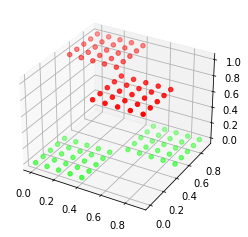

In [26]:
fis.training_data = dataXY.T
fis.expected_labels = data_labels
fis.show_results()

<H1>Zadanie</H1>

Naucz system ANFIS tabliczki mnożenia. Zacznij od rozmiaru 2x2 i zwiększaj w obu kierunkach z krokiem 1 (kolejno 2x2, 3x3, 4x4, 5x5). Mierz czas jaki jest potrzebny na nauczenie systemu w zależności od wymiarów tabliczki. Zrób wykres wymiaru tabliczki od czasu uczenia i wyślij wraz ze swoim komentarzem na maila iperenc@kis.p.lodz.pl. Nie musisz dojść do rozmiaru 10x10, wystarczy 5x5, ważne żeby było widać jaka jest zależność.

In [54]:
%matplotlib auto
%matplotlib inline

Using matplotlib backend: QtAgg


In [3]:
def generate_data(size, plot=False):
    x = np.arange(1, size, 0.1)
    x,y = np.meshgrid(x, x)

    dataX = x.flatten()
    dataY = y.flatten()
    dataXY1 = np.column_stack((dataX,dataY,np.ones(len(dataX))))
    dataXY = np.column_stack((dataX,dataY))
    data_labels = np.round(dataX) * np.round(dataY)
    
    # plot
    if plot:
        fig = plt.figure(figsize=(7, 7))
        ax = fig.add_subplot(111, projection='3d')
        rgb = [[1,0,0] if cc else [0,1,0] for cc in data_labels]
        ax.scatter(dataX, dataY, data_labels, c=rgb)
        plt.show()
    
    return dataXY, data_labels

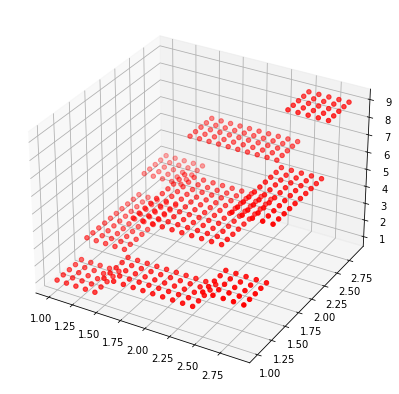

In [31]:
dataXY, data_labels = generate_data(3, plot=True)

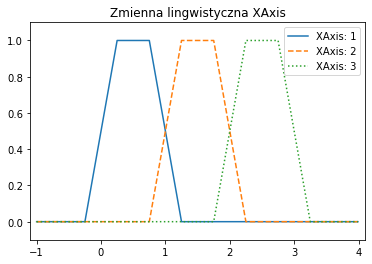

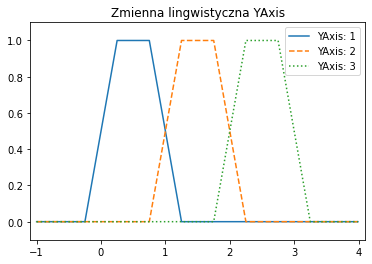

In [32]:

mf1 = [[0.5+i, 0.5, 0.5, 0.5] for i in range(3)]
varX = FuzzyInputVariable_List_Trapezoids(mf1, "XAxis", ["1","2", "3", "4", "5"])
varY = FuzzyInputVariable_List_Trapezoids(mf1, "YAxis", ["1","2", "3", "4", "5"])

#Wyświetlanie funkcji przynależnosci
plt.figure()
varX.show(start=-1, end=4)
plt.legend()

plt.figure()
varY.show(start=-1, end=4)
plt.legend()

plt.show()

Parametry początkowe:
Przesłanki:  [[[0.5, 0.5, 0.5, 0.5], [1.5, 0.5, 0.5, 0.5], [2.5, 0.5, 0.5, 0.5]], [[0.5, 0.5, 0.5, 0.5], [1.5, 0.5, 0.5, 0.5], [2.5, 0.5, 0.5, 0.5]]] 
Konkluzje:  [[0.01184202 0.49650815 0.69705447]
 [0.19367237 0.62619699 0.91695311]
 [0.4235362  0.76714848 0.81169089]
 [0.44705056 0.42833819 0.91846   ]
 [0.24105467 0.97327127 0.23180706]
 [0.60875679 0.77272692 0.52493575]
 [0.71261623 0.29690725 0.96593512]
 [0.62339687 0.94277607 0.25432033]
 [0.88127743 0.68571913 0.06313432]]


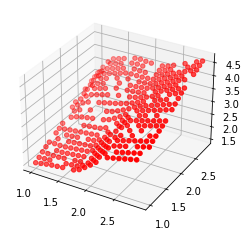

In [33]:
X_train, X_test, y_train, y_test = train_test_split(dataXY, data_labels, test_size=0.2, random_state=25)
fis = ANFIS([varX, varY], X_train.T, y_train)
print("Parametry początkowe:\nPrzesłanki: ",fis.premises, "\nKonkluzje: ", fis.tsk)
fis.show_results()

c:\Users\Lukasz\OneDrive - Politechnika Łódzka\siium\semestr-2\msi\labs\anfis1\ANFIS.py:89: RuntimeWarning: invalid value encountered in true_divide
  Rnorm = R / Rsum


Optymalizacja zakończona!
z blędem:   31.178527331107087
Liczba ew:  193914
Liczba it:  50
TIME elapsed:  57.77447295188904


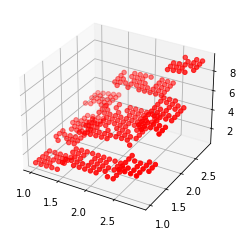

In [34]:
start = time.time()
fis.train(True, True, False, True, n_iter=50)
end = time.time()
print("TIME elapsed: ", end - start)   
fis.training_data = X_train.T
fis.expected_labels = y_train
fis.show_results()

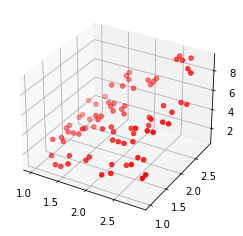

[[ 3  0  0  0  0  0]
 [ 0 21  0  0  0  0]
 [ 0  0  8  0  0  0]
 [ 0  0  0 22  0  0]
 [ 0  0  0  0 20  0]
 [ 0  0  0  0  0  6]]


In [35]:
fis.training_data = X_test.T
fis.expected_labels = y_test
fis.show_results()

y_pred = fis.anfis_estimate_labels(fis.premises,fis.op,fis.tsk)
y_pred = list(map(round,y_pred.flatten()))
print(confusion_matrix(y_test, y_pred))

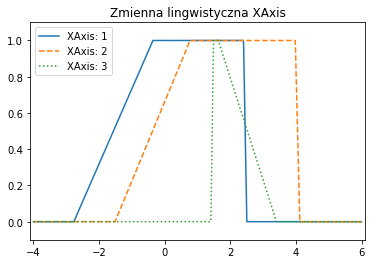

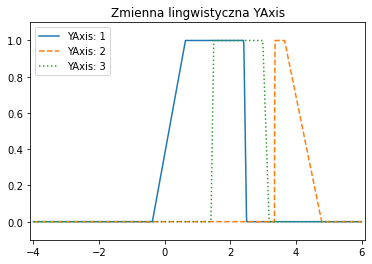

In [38]:
#Wyświetlanie funkcji przynależnosci
plt.figure()
varX.show(start=-4, end=6)
plt.legend()

plt.figure()
varY.show(start=-4, end=6)
plt.legend()

plt.show()

# Pomiar czasu

In [25]:
times = []
accuracies = []

for size in range(2, 6):
    dataXY, data_labels = generate_data(size)
    
    mf1 = [[0.5+i, 0.5, 0.5, 0.5] for i in range(size)]
    var_names = [str(i) for i in range(size)]
    varX = FuzzyInputVariable_List_Trapezoids(mf1, "XAxis", var_names)
    varY = FuzzyInputVariable_List_Trapezoids(mf1, "YAxis", var_names)
    
    X_train, X_test, y_train, y_test = train_test_split(dataXY, data_labels, test_size=0.2, random_state=25)
    fis = ANFIS([varX, varY], X_train.T, y_train)
    
    start = time.time()
    fis.train(True, True, False, True, n_iter=50)
    elapsed_time = time.time() - start
    
    fis.training_data = X_test.T
    fis.expected_labels = y_test
    y_pred = fis.anfis_estimate_labels(fis.premises,fis.op,fis.tsk)
    y_pred = np.round(y_pred.flatten())
    accuracy = accuracy_score(y_test, y_pred)
    print(accuracy)
    
    times.append(elapsed_time)
    accuracies.append(accuracy)

c:\Users\Lukasz\OneDrive - Politechnika Łódzka\siium\semestr-2\msi\labs\anfis1\ANFIS.py:89: RuntimeWarning: invalid value encountered in true_divide
  Rnorm = R / Rsum


Optymalizacja zakończona!
z blędem:   1.456862049889898
Liczba ew:  62737
Liczba it:  50
1.0


c:\Users\Lukasz\OneDrive - Politechnika Łódzka\siium\semestr-2\msi\labs\anfis1\ANFIS.py:89: RuntimeWarning: invalid value encountered in true_divide
  Rnorm = R / Rsum


Optymalizacja zakończona!
z blędem:   14.894117636638512
Liczba ew:  222334
Liczba it:  50
1.0


c:\Users\Lukasz\OneDrive - Politechnika Łódzka\siium\semestr-2\msi\labs\anfis1\ANFIS.py:89: RuntimeWarning: invalid value encountered in true_divide
  Rnorm = R / Rsum


Optymalizacja zakończona!
z blędem:   31.30702817973006
Liczba ew:  353732
Liczba it:  50
0.9944444444444445


c:\Users\Lukasz\OneDrive - Politechnika Łódzka\siium\semestr-2\msi\labs\anfis1\ANFIS.py:89: RuntimeWarning: invalid value encountered in true_divide
  Rnorm = R / Rsum


Optymalizacja zakończona!
z blędem:   714.9023429932266
Liczba ew:  464130
Liczba it:  50
0.584375


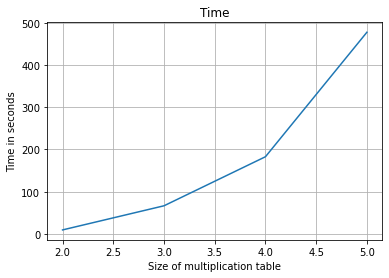

In [27]:
plt.plot(np.arange(2, 6), times)
plt.title('Time')
plt.xlabel('Size of multiplication table')
plt.ylabel('Time in seconds')
plt.grid()

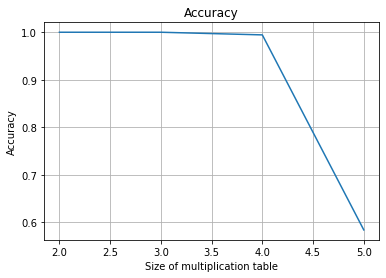

In [30]:
plt.plot(np.arange(2, 6), accuracies)
plt.title('Accuracy')
plt.xlabel('Size of multiplication table')
plt.ylabel('Accuracy')
plt.grid()